In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_name = '../../data/fd-export.csv'

## read file
df = pd.read_csv(file_name)
cond_file_name = '../../data/conditions_list.csv'
df_conditions = pd.read_csv(cond_file_name)
"""
    Function to remove abnormal age.
    This is required for reusability purpose.
    
    @Input : dataframe
    @Return : dataframe
"""
def remove_abnormal_age(df):
    df.age = df.age.fillna(-1)
    invalid_ids = set(df[ (df.age<0) | (df.age > 100) ].user_id.values)
    valid_df = df[~df.user_id.isin(invalid_ids)]
    
    print("Valid users with norma age = {}, Percentage {}".format( valid_df.user_id.unique().shape[0]
                                                                  , valid_df.user_id.unique().shape[0]/
                                                               float( df.user_id.unique().shape[0] ) ))
    
    return valid_df

## filter the user
df_processed = remove_abnormal_age(df)

df_processed.head(10)
    

/home/shibin/softwares/anaconda2/envs/nlpproject/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Valid users with norma age = 20456, Percentage 0.9268270581305786


,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value
1,QEVuQwEAWRNGnuTRqXG2996KSkTIEw==,31.0,male,US,2015-11-26,1069,Condition,Ulcerative colitis,0
2,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,1.0,female,CA,2017-04-28,3168,Condition,pain in left upper arm felt like i was getting...,4
3,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,1.0,female,CA,2017-04-28,3169,Condition,hip pain when gettin up,3
4,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,1.0,female,CA,2017-04-28,3170,Condition,pain in hand joints,4
5,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,1.0,female,CA,2017-04-28,3171,Condition,numbness in right hand,2
6,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,1.0,female,CA,2017-04-28,1356,Condition,Headache,2
7,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,1.0,female,CA,2017-04-28,3172,Condition,pain in left ankle,1
8,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,1.0,female,CA,2017-04-28,3173,Condition,pain in left leg,1
9,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,1.0,female,CA,2017-04-28,3174,Condition,pain in joints on feet,2
10,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,1.0,female,CA,2017-04-28,3175,Condition,neck and upper back pain,2


<ipython-input-3-ebc577838676>:11: RuntimeWarning: Mean of empty slice.
  mean_ratings.append(ratings.values.mean())
/home/shibin/softwares/anaconda2/envs/nlpproject/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shibin/softwares/anaconda2/envs/nlpproject/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


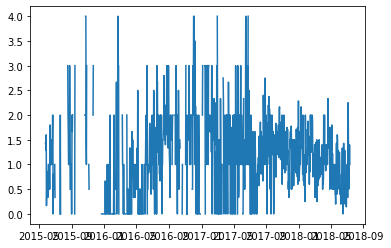

In [3]:
## convert time
df['checkin_date'] = pd.to_datetime(df['checkin_date'])
crohns_df = df
import matplotlib.pyplot as plt
dates = list(set(crohns_df['checkin_date']))
dates.sort()
mean_ratings = []
for date in dates:
    date_df = crohns_df[crohns_df['checkin_date'] == date]
    ratings = pd.to_numeric(date_df[date_df['trackable_name'] == 'Crohn\'s disease']['trackable_value'])
    mean_ratings.append(ratings.values.mean())
plt.plot(dates,mean_ratings)

[1.7850705859601625, 1.7390626973767316, 1.6366230835600983, 1.649900821762539, 1.661167993932499, 1.6514856834143705, 1.7206338000549084, 1.8315618166098764, 1.8564699016174755, 1.7982441330406889, 1.7249553120385481, 1.7087938724064378]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

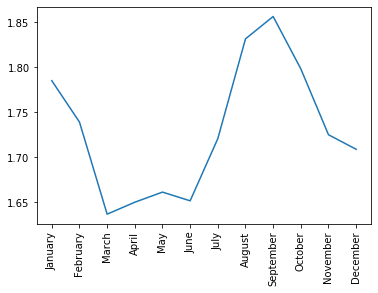

In [4]:
## chrnoic disease by month


## convert time

crohns_df['month'] = crohns_df['checkin_date'].map( lambda x: x.month) 
import matplotlib.pyplot as plt
dates = [x+1 for x in range(12)]
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']
dates.sort()
mean_ratings = []
for date in dates:
    date_df = crohns_df[crohns_df['month'] == date]
    ratings = pd.to_numeric(date_df[ (date_df['trackable_type'] == 'Condition') & (date_df.country =='US') ]['trackable_value'])
    mean_ratings.append(ratings.values.mean())
print(mean_ratings)
plt.plot(months,mean_ratings)
plt.xticks(rotation = 90)

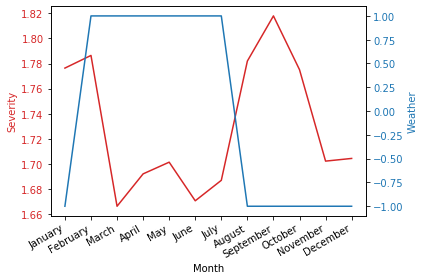

In [5]:

avg_us_temp = [0.09,1.95,5.96,9.46,18.62,21.97,24.14,23.06,19.74,12.06,4.46,1.96]
crohns_df['month'] = crohns_df['checkin_date'].map( lambda x: x.month) 
import matplotlib.pyplot as plt
dates = [x+1 for x in range(12)]
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']
dates.sort()
mean_ratings = []
for date in dates:
    date_df = crohns_df[crohns_df['month'] == date]
    ratings = pd.to_numeric(date_df[ (date_df['trackable_type'] == 'Condition')  ]['trackable_value'])
    mean_ratings.append(ratings.values.mean())
# ax1 = plt.plot(months,mean_ratings)
# ax2 = ax1.twinx()
# ax2.plot(months, avg_us_temp)
# plt.xticks(rotation = 90)

temp_temp = [avg_us_temp[-1]] + avg_us_temp
diff_temp = [ abs(temp_temp[i] - temp_temp[i-1])/(temp_temp[i] - temp_temp[i-1]) for i in range(1, 13)]


fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Month')
ax1.set_ylabel('Severity', color=color)
ax1.plot(months, mean_ratings, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Weather', color=color)  # we already handled the x-label with ax1
ax2.plot(months, diff_temp , color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.autofmt_xdate()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [6]:
df.trackable_type.unique()

array(['Condition', 'Symptom', 'Weather', 'Treatment', 'Tag', 'Food',
       'HBI'], dtype=object)

In [41]:
## find symptoms with dieseas
# df.trackable_value = df.trackable_value.fillna("")
df.trackable_name = df.trackable_name.map(lambda x: x.lower()) 

df_with_treamnet = df[ (df.trackable_type == 'Treatment') & (df.trackable_name.str.contains('fludrocortisone') ) ].user_id.unique()
df_with_symptoms_nausea = df[ (df.trackable_type == 'Symptom') & (df.trackable_name.str.contains('nausea') ) ].user_id.unique()

df_inter_nausea = len( set(df_with_treamnet).intersection(set(df_with_symptoms_nausea)))

In [51]:


df_with_symptom_headache = df[ (df.trackable_type == 'Symptom') & (df.trackable_name.str.contains('headache') ) ].user_id.unique()

df_inter_headache_inter = len( set(df_with_treamnet).intersection(set(df_with_symptom_headache).difference(set(df_with_treamnet).intersection(set(df_with_symptoms_nausea)))))
df_inter_headache = len( set(df_with_treamnet).intersection(set(df_with_symptom_headache)))

In [52]:
print(df_inter_headache)
print(df_inter_nausea)
print(df_inter_headache_inter)
print(len(df_with_treamnet))



31
34
12
62


In [35]:
df_with_treamnet

array(['QEVuQwEAbymsqXo6/YiPKLE/okTHVw==',
       'QEVuQwEAiK7g4vl5WtmLnaj7YOUdJQ==',
       'QEVuQwEA+u/l0/4M1Rt9s+FdDEAj+Q==',
       'QEVuQwEACjjNShW3fFdW3Uk1b+sG+A==',
       'QEVuQwEAgHLD0d4XVwDA/zjy5AlWOQ==',
       'QEVuQwEAr8nO6PWOADP/WjkJchrNqg==',
       'QEVuQwEAb03A8v3K9a30gEIpi9XSgg==',
       'QEVuQwEAt/HCXKWU8SRNwV3P5AbEgg==',
       'QEVuQwEALtB/qtDrI1Oc4WuyMZ20qA==',
       'QEVuQwEAJvUSWIAcc6ekqtQnW1p+xQ==',
       'QEVuQwEAqA92CedIBsft4+CAz8PMtQ==',
       'QEVuQwEACvDWtHIN1JCF/d/9zVi1AQ==',
       'QEVuQwEAjJv1RYsQyv5iawRxjxJnEw==',
       'QEVuQwEA5iwZ2eVh4Uth1F5DlVZhIw==',
       'QEVuQwEA3ADEEVybupc4yVWcBm9EGA==',
       'QEVuQwEAUBt8emhQ2BVDdol+w3lBrQ==',
       'QEVuQwEAq+UeNEjgZBZKH3HMHpcH/A==',
       'QEVuQwEAjQyli52JszCT8Jb+HSmVfQ==',
       'QEVuQwEAAqBuhW39t7tmi9cCz5BHNw==',
       'QEVuQwEAzE2zoYvGznjC32zvIz3xew==',
       'QEVuQwEACR2sVERZagcoGSua+BlOLQ==',
       'QEVuQwEArUcYSh2bxc9QAMRxjT7qwg==',
       'QEVuQwEA02SoAGmOw9iNT/PYEd/wew==',
       'QEV

In [13]:
for name in df[ (df.trackable_type == 'Treatment') ].trackable_name.unique():
    if 'fludr' in name.lower():
        print(name)

fludrocortisone
fludricortisone
fludrocort
fludrocortisone 0.1mg


In [40]:
df[ (df.trackable_type == 'Symptom') & (df.trackable_name.str.contains('headache') ) ].user_id.unique()


array(['QEVuQwEAzZl+kJVQFj2hY5xrzOcbnA==',
       'QEVuQwEAe5QH0aqmxPXcFoSbaB+mkw==',
       'QEVuQwEAT556zzFRIWMYQwW/SuVuQg==', ...,
       'QEVuQwEAfVS7sGFBq70NVn5XZYf7Sg==',
       'QEVuQwEA6tVnDmhO0UaM0Fw/OMb7IQ==',
       'QEVuQwEAUuGkJbPOl/k3sOZp+tkH8Q=='], dtype=object)

In [39]:
df[ (df.trackable_type == 'Symptom') ]

,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value,month
15,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,1.0,female,CA,2017-04-28,123,Symptom,joint stiffness,3,4
24,QEVuQwEAO+R1md5HUn8+w1Qpbg7ogw==,-1.0,NaN,NaN,2015-05-26,152,Symptom,nausea,1,5
31,QEVuQwEAO+R1md5HUn8+w1Qpbg7ogw==,-1.0,NaN,NaN,2015-06-14,152,Symptom,nausea,0,6
32,QEVuQwEAO+R1md5HUn8+w1Qpbg7ogw==,-1.0,NaN,NaN,2015-06-14,8,Symptom,anxiety,0,6
38,QEVuQwEAO+R1md5HUn8+w1Qpbg7ogw==,-1.0,NaN,NaN,2015-06-11,152,Symptom,nausea,0,6
...,...,...,...,...,...,...,...,...,...,...
3487600,QEVuQwEAk8TstQqKvjz8p2J6FAqOcA==,24.0,male,GB,2018-07-12,2564,Symptom,frequent bowel movements,2,7
3487616,QEVuQwEAUuGkJbPOl/k3sOZp+tkH8Q==,28.0,female,US,2018-07-12,273,Symptom,hives,4,7
3487617,QEVuQwEAUuGkJbPOl/k3sOZp+tkH8Q==,28.0,female,US,2018-07-12,829,Symptom,excessive daytime sleepiness,2,7
3487618,QEVuQwEAUuGkJbPOl/k3sOZp+tkH8Q==,28.0,female,US,2018-07-12,364,Symptom,headaches,3,7


# Severity of the Disease

In [61]:
df_conds = df[ (df.trackable_type == 'Condition') ]
df_conds.trackable_value = df_conds.trackable_value.map( lambda x: int(x)) 
df_conds.trackable_value.value_counts().()

2    124228
1    121074
0    112098
3     89921
4     58140
Name: trackable_value, dtype: int64

In [63]:
df_conds.trackable_value.value_counts().reset_index()

,index,trackable_value
0,2,124228
1,1,121074
2,0,112098
3,3,89921
4,4,58140


Text(0.5, 1.0, 'Severity Count Plot')

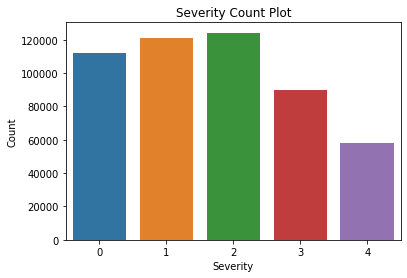

In [68]:
import seaborn as sn
import matplotlib.pyplot as plt
plot = sns.barplot(data = df_conds.trackable_value.value_counts().reset_index(), x ='index', y ='trackable_value' )
plot.set(xlabel = "Severity", ylabel = "Count")
plot.set_title("Severity Count Plot")

In [70]:
s_val_count = df_conds.trackable_value.value_counts().reset_index()
s_low = s_val_count[s_val_count.index<2].sum()
s_high = s_val_count[s_val_count.index>2].sum()
s_medium = s_val_count[s_val_count.index<2].sum()

In [77]:
print(s_high.trackable_value)

148061


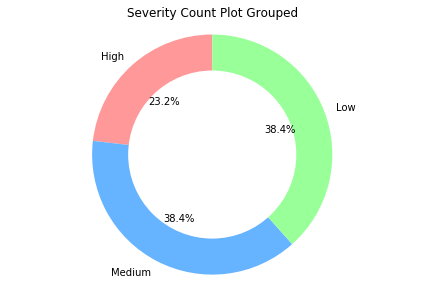

In [81]:
## plot 
import matplotlib.pyplot as plt
# Pie chart
labels = ['High', 'Medium', 'Low']
sizes = [s_high.trackable_value, s_medium.trackable_value, s_low.trackable_value]
#colors
colors = ['#ff9999','#66b3ff','#99ff99']
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title("Severity Count Plot Grouped")
plt.show()
